# Porter: Neural Networks Regression


- Context:

  Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

  Porter works with a wide range of restaurants for delivering their items directly to the people.

  Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

  This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

# Importing Libraries

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import os
#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns
#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#ann training
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from tensorflow.keras.metrics import MeanAbsolutePercentageError # Changed to capitalized 'MeanAbsolutePercentageError'
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam

# Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/Porter NN.csv", encoding='latin-1')

In [5]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [7]:
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [8]:
print('NAN in total_onshift_partners :',(len(df['total_onshift_partners'])-df['total_onshift_partners'].isna().sum())/len(df['total_onshift_partners'])*100)
df.drop(['total_onshift_partners'],inplace=True,axis=1)
print('NAN in total_busy_partners :',(len(df['total_busy_partners'])-df['total_busy_partners'].isna().sum())/len(df['total_busy_partners'])*100)
df.drop(['total_busy_partners'],inplace=True,axis=1)
print('NAN in total_outstanding_orders :',(len(df['total_outstanding_orders'])-df['total_outstanding_orders'].isna().sum())/len(df['total_outstanding_orders'])*100)
df.drop(['total_outstanding_orders'],inplace=True,axis=1)
df.head()

NAN in total_onshift_partners : 91.7630731203274
NAN in total_busy_partners : 91.7630731203274
NAN in total_outstanding_orders : 91.7630731203274


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600


In [9]:
df['store_primary_category'].value_counts()
df['store_primary_category'].fillna('Other',inplace=True)
df['market_id'].value_counts()
df['market_id'].fillna('0.0',inplace=True)
df['order_protocol'].value_counts()
df['order_protocol'].fillna('0.0',inplace=True)
df.dropna(subset=['actual_delivery_time'],inplace=True)
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   market_id               197421 non-null  object
 1   created_at              197421 non-null  object
 2   actual_delivery_time    197421 non-null  object
 3   store_id                197421 non-null  object
 4   store_primary_category  197421 non-null  object
 5   order_protocol          197421 non-null  object
 6   total_items             197421 non-null  int64 
 7   subtotal                197421 non-null  int64 
 8   num_distinct_items      197421 non-null  int64 
 9   min_item_price          197421 non-null  int64 
 10  max_item_price          197421 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 18.1+ MB


<ipython-input-9-246d9545e527>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['market_id'].fillna('0.0',inplace=True)
<ipython-input-9-246d9545e527>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['order_protocol'].fillna('0.0',inplace=True)


In [10]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
df[cat_col].nunique()

Categorical columns : ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol']
Numerical columns : ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']


,0
market_id,7
created_at,180981
actual_delivery_time,178110
store_id,6743
store_primary_category,75
order_protocol,8


In [11]:
df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64[ns]')
df['created_at']=df['created_at'].astype('datetime64[ns]')
df['Time_taken_for_delivery']= (df['actual_delivery_time']-df['created_at'])/pd.Timedelta('60s')
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

Dropping the Column that are no longer required

In [12]:
df.drop(['created_at','actual_delivery_time','store_id'],axis=1,inplace=True)

In [13]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,Time_taken_for_delivery,hour,day
0,1.0,5,1.0,4,3441,4,557,1239,62.983333,22,4
1,2.0,48,2.0,1,1900,1,1400,1400,67.066667,21,1
2,3.0,0,1.0,1,1900,1,1900,1900,29.683333,20,3
3,3.0,0,1.0,6,6900,5,600,1800,51.250000,21,1
4,3.0,0,1.0,3,3900,3,1100,1600,39.833333,2,6


 # Data visualization

<Axes: >

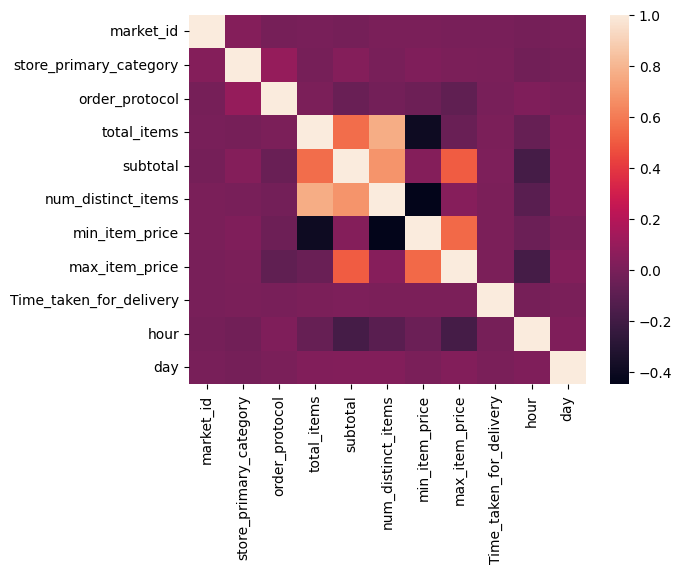

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

<Axes: xlabel='market_id', ylabel='total_items'>

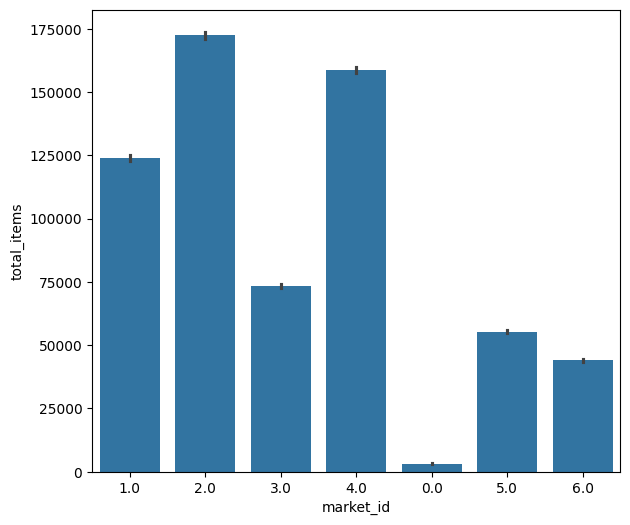

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(y='total_items',x='market_id',data=df,estimator='sum')

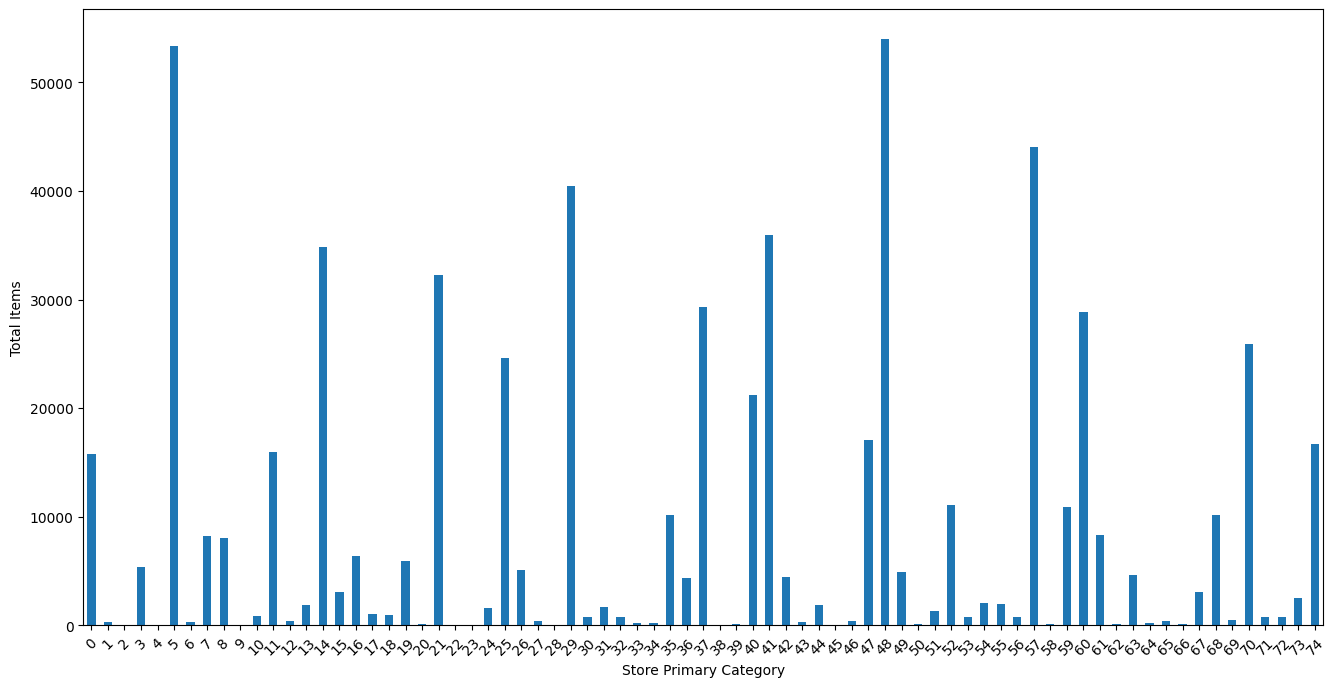

In [24]:
aggregated_data = df.groupby('store_primary_category')['total_items'].sum()

# Plot using Pandas
plt.figure(figsize=(16, 8))
aggregated_data.plot(kind='bar')
plt.xlabel('Store Primary Category')
plt.ylabel('Total Items')
plt.xticks(rotation=45)
plt.show()

<ipython-input-34-5af4027aa193>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='total_items', x='order_protocol', data=df, estimator='sum', palette="Set2")


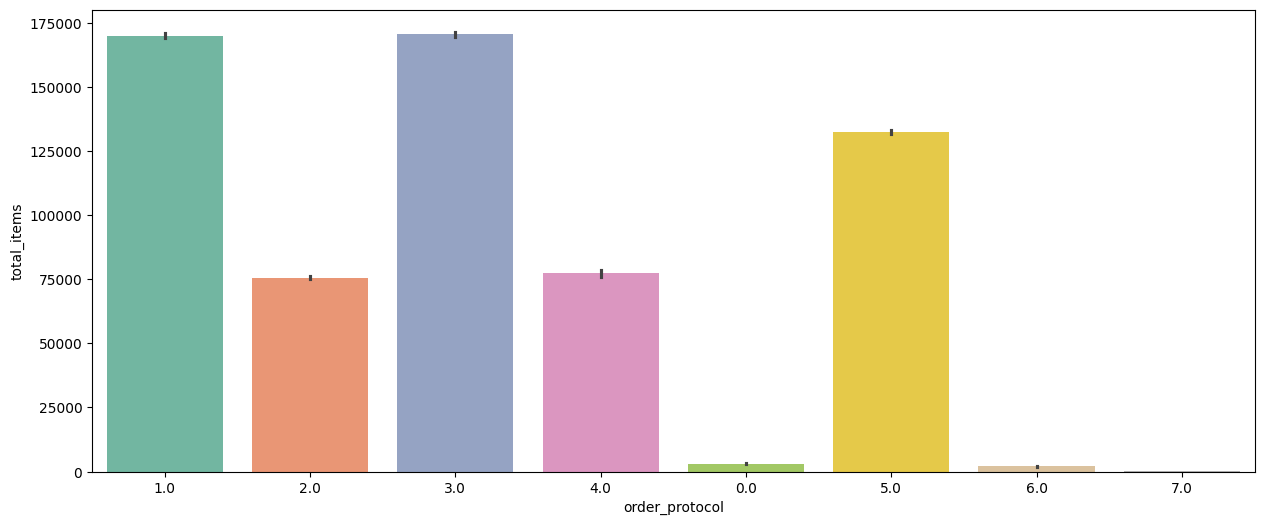

In [34]:
# Create the figure and axis with specified sizes
plt.figure(figsize=(15, 6))

# Create the barplot with a color palette
sns.barplot(y='total_items', x='order_protocol', data=df, estimator='sum', palette="Set2")

# Show the plot
plt.show()


This barplot is a powerful tool for visualizing and comparing the sum of total_items across different order_protocol categories, providing a clear overview that can inform strategic decisions or further analysis.

<Axes: xlabel='hour', ylabel='count'>

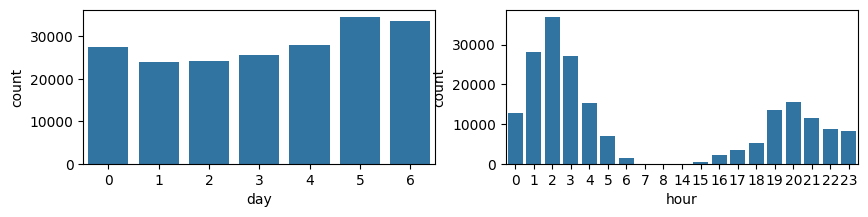

In [35]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.countplot(x=df['day'])
plt.subplot(122)
sns.countplot(x=df['hour'])

In summary, this visualization is useful for understanding the temporal distribution of the data across both days and hours, which can provide valuable insights into patterns of activity or behavior in your dataset.

<Axes: xlabel='hour', ylabel='Time_taken_for_delivery'>

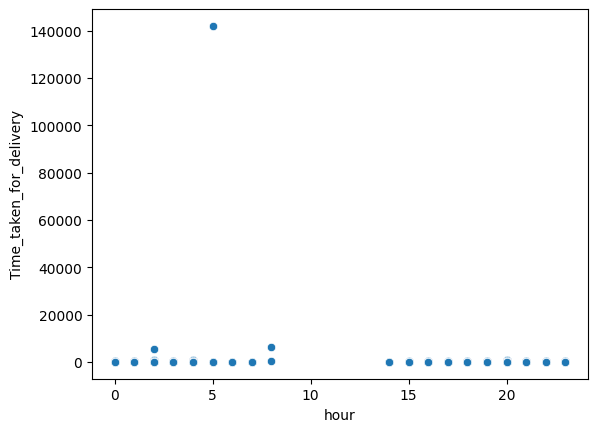

In [37]:
sns.scatterplot(x='hour',y='Time_taken_for_delivery',data=df)

No Collinearity

Detecting Outliers

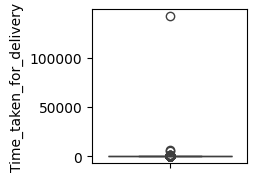

In [38]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

In [39]:
print((df.loc[df['Time_taken_for_delivery'] >400].shape[0] / df.shape[0]) * 100)
df.drop(index=df.loc[df['Time_taken_for_delivery'] >400].index[0],inplace=True)

0.009624102805679234


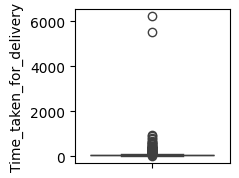

In [40]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

- The boxplot provides a visual summary of the distribution of Time_taken_for_delivery. It shows the median (the line within the box), the interquartile range (IQR, the box itself), and potential outliers (individual points outside the "whiskers").
- This boxplot provides a concise summary of the delivery times in your dataset, highlighting the central tendency, variability, and potential outliers. It is a powerful tool for quickly assessing the overall distribution and identifying any anomalies that may warrant further investigation.









# Model training

In [41]:
y=df['Time_taken_for_delivery']
x=df.drop(['Time_taken_for_delivery'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
# Predictions from the regressor model
prediction = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, prediction)
print(f"MSE: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)
print(f"MAE: {mae}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f"MAPE: {mape}")

r2_score(y_test,prediction)

MSE: 1294.4790646110878
RMSE: 35.978869696129806
MAE: 12.84608592592489
MAPE: 29.56726365538907


0.021615230223949733

- The MSE is 1294.48. MSE measures the average squared difference between the actual (y_test) and predicted values.
- The RMSE is 35.98, which is simply the square root of MSE. RMSE is in the same units as the target variable (y_test), making it more interpretable.
- The MAE is 12.85, which represents the average absolute difference between the actual and predicted values.
- The MAPE is 29.57%, which indicates the average percentage error between the predicted and actual values.
- The R² score is 0.0216. The R² score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables
- Overall, the metrics suggest that the model has significant room for improvement. The errors (MSE, RMSE, MAE, MAPE) indicate that the predictions deviate notably from the actual values. Additionally, the very low R² score suggests that the model is not effectively capturing the relationship between the features and the target variable. This might be due to a variety of reasons, such as the model being too simple, the data not being well-suited to the model, or important features being excluded. Improving the model might involve exploring different algorithms, feature engineering, or tuning model hyperparameters.

# Neural networks

In [44]:
#Scalling the data to feed before neural network

from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In order to train our regression model, which is a two-layered sequential model, we will construct a basic neural network.

We have maintained 32 nodes in the next layers, which can be altered or experimented with, and the number of nodes in the initial layers equal to the number of input columns.

Since relu is a fantastic nonlinear activation function that works in most situations, the layers' activation is left at that; however, if we noticed gradient disappearing, we might have utilized leaky relu.

Since our delivery time is the only result that the final layer would provide, it only has one node, and its activation function should be linear.


In [45]:
model=Sequential()
model.add(Dense(11,kernel_initializer='normal',activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='Adam',metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2054.1948 - mae: 39.1238 - mse: 2054.1948 - val_loss: 1356.8680 - val_mae: 14.5822 - val_mse: 1356.8680
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 434.9114 - mae: 14.2635 - mse: 434.9114 - val_loss: 1314.7288 - val_mae: 13.7988 - val_mse: 1314.7288
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 390.7072 - mae: 13.6208 - mse: 390.7072 - val_loss: 1290.1556 - val_mae: 13.2685 - val_mse: 1290.1556
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 360.5698 - mae: 13.2629 - mse: 360.5698 - val_loss: 1283.9537 - val_mae: 13.4316 - val_mse: 1283.9537
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 378.2274 - mae: 13.2708 - mse: 378.2274 - val_loss: 1282.6713 - val_mae: 13.3735 - val_mse: 1282.6713
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 377.3006 - mae: 13.2080 - mse: 377.3006 - val_loss: 1280.1488 - val_mae: 13.1386 - val_mse: 1280.1488
Epoch 7/10
247/247 ━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             121 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,784 (18.69 KB)

 Trainable params: 1,594 (6.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,190 (12.46 KB)

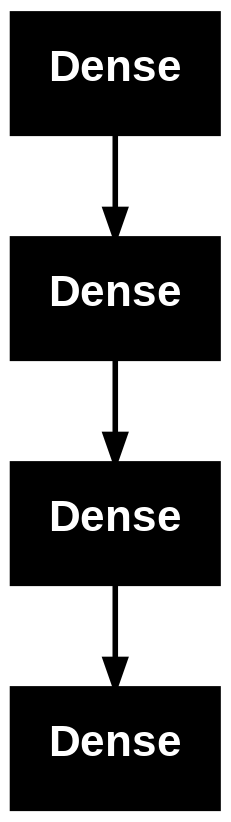

In [46]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)

- In terms of parameters, the model has a total of 4,784 parameters. The breakdown is as follows: the first Dense layer has 121 parameters, the second has 384, the third has 1,056, and the final layer has 33 parameters. Out of the total, 1,594 are trainable parameters, while the rest are related to the optimizer.

- The optimizer used is Adam, and the model is compiled with Mean Squared Error (MSE) as the loss function, alongside MSE and Mean Absolute Error (MAE) as metrics. The model was trained for 10 epochs with a batch size of 512 and a validation split of 20%, which suggests you're working with a reasonably large dataset to require such a batch size.

- Overall, the model seems well-suited for regression tasks with a moderate complexity, given its architecture and parameter count. The training history and validation performance will further reveal its effectiveness and potential areas for improvement.

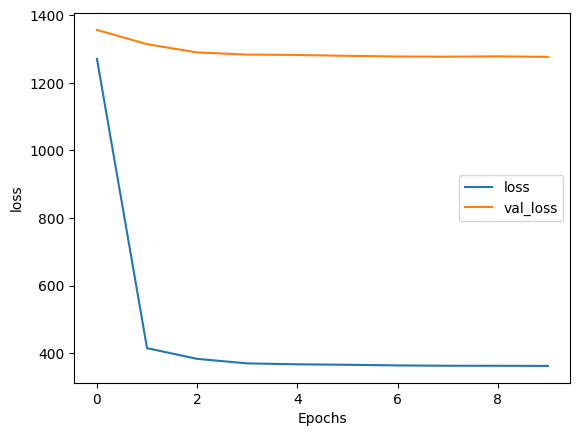

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

- Training Loss (loss): This line represents how well the model is fitting the training data over each epoch. A decreasing trend indicates that the model is learning and improving its fit to the training set. If this line flattens out or starts to increase, it might suggest overfitting or that the model has reached its optimal performance on the training data.

- Validation Loss (val_loss): This line shows how well the model performs on unseen validation data over the epochs. Ideally, this line should also decrease and closely follow the training loss. If the validation loss starts to diverge from the training loss, especially increasing while the training loss continues to decrease, it may indicate overfitting.

- Overall, the plot helps assess the model's learning curve and whether adjustments to the model or training process are necessary.

In [49]:
print('r2_score:',r2_score(y_test, model.predict(X_test)))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, model.predict(X_test))
print("mae : ",mae)

1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
r2_score: 0.019148066896278126
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
mse :  1297.7433133763034
rmse :  36.02420454883499
errors for neural net
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
mae :  13.249977692117227


- The R² score is approximately 0.019. This is quite low, indicating that the model's predictions are not explaining much of the variance in the target variable.
- The MSE is 1297.74. This metric quantifies the average squared difference between the predicted values and the actual values.
- The RMSE is approximately 36.02. RMSE is the square root of MSE and provides a measure of the average magnitude of the prediction errors. The MAE is 13.25.
- The low R² score, high MSE, and RMSE values suggest that the current model may not be performing well. The MAE, while lower than RMSE, also reflects substantial prediction errors. This could indicate that the model is either too simple, the data might be very complex or noisy, or other factors affecting performance need to be addressed. You might consider experimenting with more complex models, adjusting hyperparameters, or conducting further feature engineering to improve the model’s performance.

In [50]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, model.predict(X_test))

1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


0.3102008603563024

With a MAPE of 31.02%, your model's predictions are off by about 31% on average, which is relatively high. This suggests that the model has a significant percentage error in its predictions, indicating room for substantial improvement.

By comparing the results of our neural network model with the random forest model we can see that without any tuning or creating pretty complex architectures for training our model we have achieved high accuracy

# Recommendations:

- Experiment with deeper architectures or more complex models such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs), depending on your data type and problem.
-  Optimize hyperparameters like the number of layers, number of neurons per layer, activation functions, and learning rate. Use techniques like grid search or random search.

- Compare Models: Test different types of models and compare their performance to determine the best approach for your problem.
Benchmarking: Compare your model's performance against baseline models or other state-of-the-art methods to assess its relative effectiveness.

# Leading Questions:

1. Problem Statements and Applications
  Problem Statement:

  - Objective: To estimate delivery times for Porter’s intra-city logistics operations based on various features like order details, restaurant location, delivery partner characteristics, and other relevant factors.
  - Use Case: This regression model will help Porter provide accurate estimated delivery times to customers, improving customer satisfaction and operational efficiency. It can also optimize delivery routing and scheduling, leading to better resource management and cost savings.
  Applications and Modifications:

  - Dynamic Routing: Use estimated times to dynamically adjust delivery routes in real-time.
  - Resource Allocation: Optimize the allocation of delivery partners based on expected delivery times to manage workloads effectively.
  - Customer Communication: Enhance the customer experience by providing more accurate and reliable delivery time estimates.

2. Pandas Datetime Functions
  - pd.to_datetime(): Converts a string or list-like object to a datetime object.
  - pd.date_range(): Generates a range of datetime values with specified frequency.
  - pd.DatetimeIndex(): Creates a DatetimeIndex from a list or array of dates, allowing for efficient time-based indexing and operations.

3. Short Note on datetime, timedelta, and Period
  - datetime: Represents a specific point in time, including the date and time. It is used for working with timestamps and performing operations on date and time values.

  - timedelta: Represents the difference between two dates or times. It is used to perform arithmetic operations involving time, such as adding or subtracting time durations.

  - Period: Represents a specific time span or interval, such as a month or a year, with a start and end. It is useful for representing and manipulating periods of time in a more granular way.

4. Checking for Outliers
- Why Check for Outliers:

  - Outliers can skew and mislead the training of machine learning models, leading to inaccurate predictions and model performance issues.
  - They can indicate errors in data collection or entry, which need to be addressed to improve data quality and model reliability.

5. Outlier Removal Methods
  - Z-Score Method: Identifies outliers by measuring how many standard deviations away a data point is from the mean.
  - IQR (Interquartile Range) Method: Uses the spread between the first and third quartiles to identify and remove extreme values.
  - Modified Z-Score Method: A robust version of the Z-score method that uses the median and median absolute deviation to identify outliers, especially in small datasets.

6. Classical Machine Learning Methods
  - Linear Regression: A basic regression technique that models the relationship between input features and the target variable.
  - Decision Trees: Models that partition the feature space into distinct regions, making predictions based on the majority class or average value in each region.
  - Random Forests: An ensemble of decision trees that improves accuracy and robustness by averaging predictions across multiple trees.

7. Scaling for Neural Networks
- Why Scaling is Required:

  - Neural networks converge faster and perform better when features are on a similar scale.
  - Scaling helps in achieving a more stable and efficient training process.
  - Without scaling, features with larger ranges may dominate the learning process, making it harder for the optimizer to converge.

8. Choice of Optimizer
  Brief Explanation:

  - Adam Optimizer: Combines the advantages of two other popular
  - optimizers: AdaGrad and RMSProp. It adapts the learning rate for each parameter and maintains an exponentially decaying average of past gradients and squared gradients, which helps in achieving faster convergence and better performance.
9. Activation Function
  Activation Function Used: ReLU (Rectified Linear Unit)

  - Reason:

  ReLU introduces non-linearity into the model, allowing it to learn complex patterns and relationships. It is computationally efficient and helps in mitigating the vanishing gradient problem during training.

10. Performance on Large Datasets
Why Neural Networks Perform Well on Large Datasets:

  - Learning Capacity: Neural networks have a high capacity to learn complex patterns and features from large amounts of data, which helps in generalizing better.
  - Generalization: With sufficient data, neural networks can capture intricate relationships and variations in the data, improving their predictive performance and robustness.
  - Overfitting Mitigation: Large datasets help in reducing the risk of overfitting by providing diverse examples, which helps the model to generalize better to new, unseen data.